In [1]:
from gradflow import Tensor
from gradflow.model import Model
import gradflow.functions as F
from gradflow.optim import *

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Net(Model):
  def __init__(self):
    super().__init__()

    self.dense0 = F.Linear(28*28, 16)
    self.relu = F.ReLU()
    self.dense1 =  F.Linear(16, 10)
    self.logsoftmax = F.LogSoftmax(dim=-1)
  
  def forward(self, x) -> Tensor:
    out = self.dense0(x)
    out = self.relu(out)
    out = self.dense1(out)
    return self.logsoftmax(out)

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
def testit(dset, model, criterion):
  loss = 0
  corrects = 0
  for imgs, labels in dset:
    outputs = model(imgs)
    loss += criterion(outputs, labels).data

    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += ((preds == labels).sum() / labels.size)

  return loss / len(dset), corrects / len(dset)
    

In [5]:
model = Net()
criterion = F.NLLLoss(indexed=False)
optimizer = Adam(model.parameters(), 0.001, 0.001)
# optimizer = RMSprop(model.parameters(), 0.001, 0.001, 0.99)
# optimizer = SGD(model.parameters(), 0.001, 0.001, 0.9, False)
# optimizer = Adagrad(model.parameters(), 0.01, 0.001, eps=1e-4)
# optimizer = SGD(model.parameters(), 0.001, 0, 0., True)

In [6]:
training_loss = []
corrects = []
for epoch in range(50):
  for i, (imgs, labels) in enumerate(train_dset):
    optimizer.zero_grad()

    outputs = model(imgs)
    loss = criterion(outputs, labels)

    training_loss += [loss.data]
    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += [(preds == labels).sum() / labels.size]

    loss.backward()

    optimizer.step()

    if ((i + 1) % 500 == 0):
      test_loss, test_acc = testit(test_dset, model, criterion)
      print("=============================")
      print("Last 500 train | avg. loss: %.4f, acc: %.4f" \
            % (np.mean(training_loss[-500:]), np.mean(corrects[-500:])))
      print("Test           | avg. loss: %.4f, acc: %.4f" % (test_loss, test_acc))
      print("=============================")

Last 500 train | avg. loss: 1.0776, acc: 0.6725
Test           | avg. loss: 0.4523, acc: 0.8678
Last 500 train | avg. loss: 0.3751, acc: 0.8895
Test           | avg. loss: 0.3180, acc: 0.9082
Last 500 train | avg. loss: 0.3019, acc: 0.9115
Test           | avg. loss: 0.2733, acc: 0.9222
Last 500 train | avg. loss: 0.2633, acc: 0.9231
Test           | avg. loss: 0.2459, acc: 0.9275
Last 500 train | avg. loss: 0.2379, acc: 0.9311
Test           | avg. loss: 0.2268, acc: 0.9337
Last 500 train | avg. loss: 0.2209, acc: 0.9359
Test           | avg. loss: 0.2136, acc: 0.9371
Last 500 train | avg. loss: 0.2088, acc: 0.9394
Test           | avg. loss: 0.2038, acc: 0.9414
Last 500 train | avg. loss: 0.1998, acc: 0.9421
Test           | avg. loss: 0.1960, acc: 0.9437
Last 500 train | avg. loss: 0.1929, acc: 0.9438
Test           | avg. loss: 0.1908, acc: 0.9448
Last 500 train | avg. loss: 0.1873, acc: 0.9457
Test           | avg. loss: 0.1867, acc: 0.9471
Last 500 train | avg. loss: 0.1827, acc:

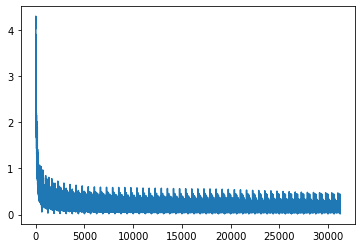

In [7]:
plt.plot(training_loss)

In [8]:
batch = 3

true_imgs, true_labels = test_dset[batch]
labels = true_labels.data.argmax(axis=1)
preds = model(true_imgs)
preds_labels = preds.data.argmax(axis=1)

In [9]:
true_labels.data

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [11]:
preds.data

array([[-1.22963686e+01, -1.06853361e+01, -1.34235296e+01,
        -1.07069910e-02, -1.47412663e+01, -5.20916557e+00,
        -1.71721859e+01, -8.15081596e+00, -9.63627243e+00,
        -5.33903408e+00],
       [-8.69376755e+00, -2.66492367e-02, -6.38229275e+00,
        -4.45149422e+00, -6.98922539e+00, -7.70796490e+00,
        -7.50974941e+00, -5.75273228e+00, -6.87925053e+00,
        -5.01231575e+00],
       [-1.30386600e+01, -1.02942181e+01, -1.34047298e+01,
        -5.02651706e-02, -1.08119230e+01, -3.04908919e+00,
        -1.52616520e+01, -1.51830015e+01, -6.73878145e+00,
        -7.87913609e+00],
       [-5.00833988e-01, -1.39844332e+01, -5.48223019e+00,
        -1.11533155e+01, -3.39144802e+00, -4.77027130e+00,
        -1.06724644e+00, -6.54211521e+00, -7.76093292e+00,
        -6.29808235e+00],
       [-1.16099348e+01, -1.36051455e+01, -6.99049997e+00,
        -5.92318153e+00, -1.27278643e+01, -1.27561579e+01,
        -1.59285803e+01, -3.96656059e-03, -9.06468582e+00,
        -8.

In [12]:
preds_labels

array([3, 1, 3, 0, 7, 2, 7, 1, 2, 1])

In [13]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [14]:
(preds_labels == labels).astype(np.uint8)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)